In [87]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import xarray as xr

server_url='http://downdraft.pmel.noaa.gov:8080/erddap'
dataset = 'CTD_dy1907_final_gridded'

e = ERDDAP(server=server_url)

e.constraints = None
e.protocol = 'griddap'

opendap_url = e.get_download_url(
    dataset_id=dataset,
    response='opendap',
)

print(opendap_url)

http://downdraft.pmel.noaa.gov:8080/erddap/griddap/CTD_dy1907_final_gridded


In [88]:
from netCDF4 import Dataset

with Dataset(opendap_url) as nc:
    print(nc.summary)

CTD Data from DY1907 - Final


In [90]:
e.dataset_id=dataset
e.response = 'nc'
ds = e.to_xarray()

OSError: [Errno -51] NetCDF: Unknown file format: b'/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/erddapy_uibo_vrm.nc'

In [91]:
ds

<xarray.Dataset>
Dimensions:     (pressure: 281, time: 1354)
Coordinates:
  * time        (time) float64 1.566e+09 1.566e+09 ... 1.568e+09 1.568e+09
  * pressure    (pressure) float64 0.0 1.0 2.0 3.0 ... 277.0 278.0 279.0 280.0
Data variables:
    latitude    (time, pressure) float32 ...
    longitude   (time, pressure) float32 ...
    BTL_103     (time, pressure) float32 ...
    S_42        (time, pressure) float32 ...
    S_41        (time, pressure) float32 31.427 31.427 31.427 ... nan nan nan
    ST_70       (time, pressure) float32 ...
    Fch_906     (time, pressure) float32 ...
    T_28        (time, pressure) float32 ...
    OST_62      (time, pressure) float32 ...
    O_65        (time, pressure) float32 ...
    T2_35       (time, pressure) float32 ...
    Tr_904      (time, pressure) float32 ...
    profile_id  (time, pressure) object ...
Attributes:
    cdm_altitude_proxy:        pressure
    cdm_data_type:             Grid
    cdm_profile_variables:     profile_id
    COMPOSITE:                 1
    Conventions:               COARDS, CF-1.6, ACDD-1.3
    CREATION_DATE:             May 12, 2020 20:21 UTC
    creation_date:             January 09, 2020 21:05 UTC
    creator_email:             pmel.ecofoci@noaa.gov
    creator_name:              NOAA/PMEL - EcoFOCI
    creator_type:              institution
    creator_url:               https://www.pmel.noaa.gov/
    DATA_CMNT:                 * FileName = C:\Sea-Bird Data\2019\DY-19-07 Le...
    EPIC_FILE_GENERATOR:       nc_epic2udunits_time.py V0.4.0
    History:                   \nMay 12, 2020 20:21 UTC EPIC two time-word ke...
    history:                   August 07, 2018 20:27 UTC File created by merg...
    infoUrl:                   https://www.ecofoci.noaa.gov/
    INST_TYPE:                 * Sea-Bird SBE 9 Data File:
    institution:               NOAA/PMEL - EcoFOCI
    keywords:                  chlorophyll, concentration, concentration_of_c...
    license:                   The data may be used and redistributed for fre...
    MOORING:                   GP123
    sourceUrl:                 (local files)
    standard_name_vocabulary:  CF Standard Name Table v55
    subsetVariables:           time, latitude, longitude, profile_id
    summary:                   CTD Data from DY1907 - Final
    time_coverage_end:         2019-09-11T07:39:40Z
    time_coverage_start:       2019-08-14T03:09:40Z
    title:                     CTD Data from DY1907 - Final
    WATER_DEPTH:               -9999
    WATER_MASS:                G

['thermal', 'haline', 'solar', 'ice', 'gray', 'oxy', 'deep', 'dense', 'algae', 'matter', 'turbid', 'speed', 'amp', 'tempo', 'rain', 'phase', 'topo', 'balance', 'delta', 'curl', 'diff', 'tarn']


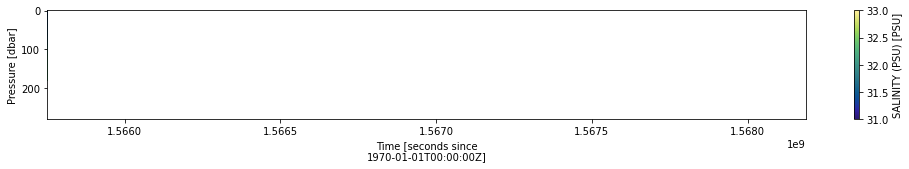

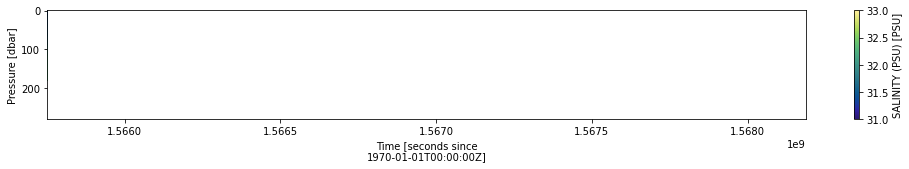

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import cmocean
print(cmocean.cm.cmapnames)
fig, ax = plt.subplots(figsize=(17, 2))
ds.S_41.T.plot(ax=ax,vmin=31,vmax=33,cmap=cmocean.cm.haline)
ax.invert_yaxis()
fig, ax = plt.subplots(figsize=(17, 2))
ds.S_42.T.plot(ax=ax,vmin=31,vmax=33,cmap=cmocean.cm.haline)
ax.invert_yaxis()

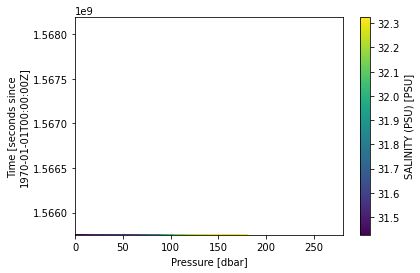

In [80]:
ds.S_41.plot()